

```
1. https://heartbeat.fritz.ai/working-with-audio-signals-in-python-6c2bd63b2daf
2. https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d
3. https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

```



#Where x = time domain NumPy series and sr = sampling rate


In [ ]:
import numpy as np
import librosa
#path of the audio file
audio_data = 'a1.wav'


#We can change this behavior by resampling at sr=44.1KHz.
x ,sr= librosa.load(audio_data)

print(type(x), type(sr))
x.shape

<class 'numpy.ndarray'> <class 'int'>


(125943,)

In [ ]:
librosa.load(audio_data, sr=None)


(array([ 7.6293945e-05,  7.6293945e-05, -1.5258789e-05, ...,
        -1.5258789e-05,  9.1552734e-05,  0.0000000e+00], dtype=float32), 44100)

In [ ]:
# Playing an audio

import IPython.display as ipd
ipd.Audio(audio_data)

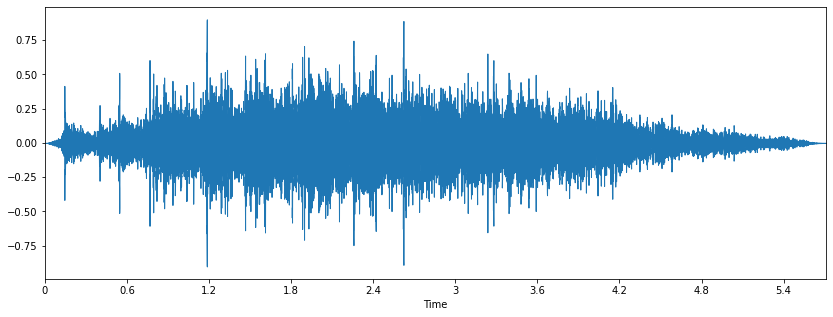

In [ ]:

import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
#plotting the sampled signal
librosa.display.waveplot(x, sr=sr)   #sample rate (sr)

#
Feature extraction from Audio signal
 
Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

#1. Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:

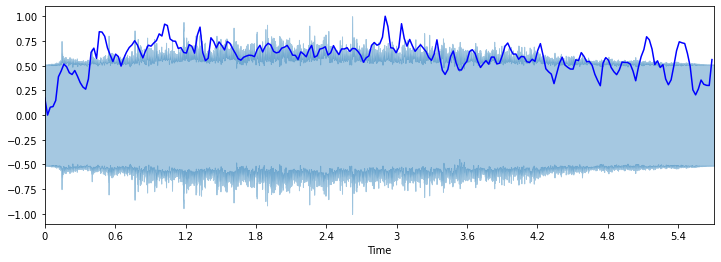

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# (775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(normalize(x), sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

#2. Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:

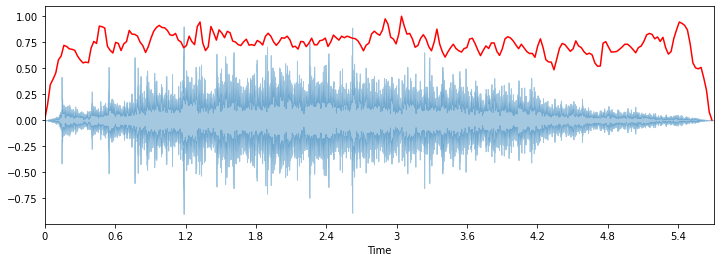

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')


#3. Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

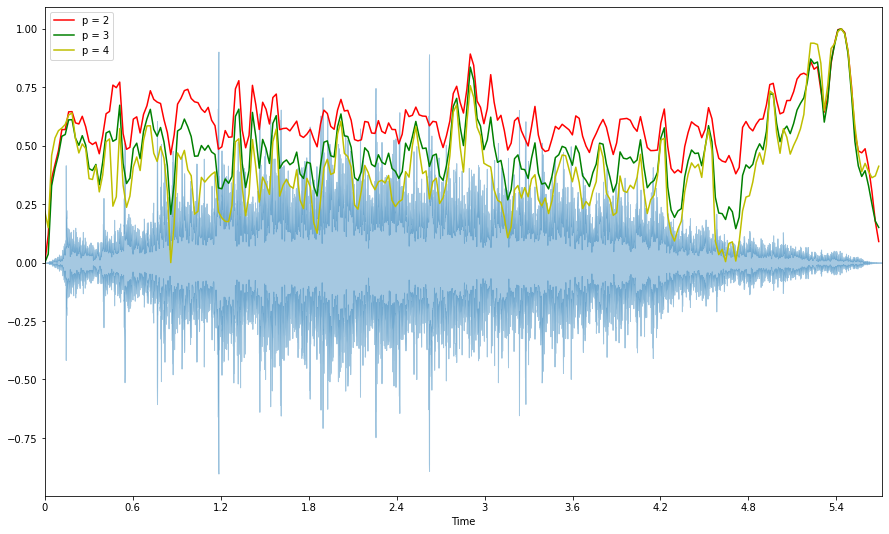

In [ ]:

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#4. Zero-Crossing Rate

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.



It usually has higher values for highly percussive sounds like those in metal and rock. Now let us visualize it and see how we calculate zero crossing rate.

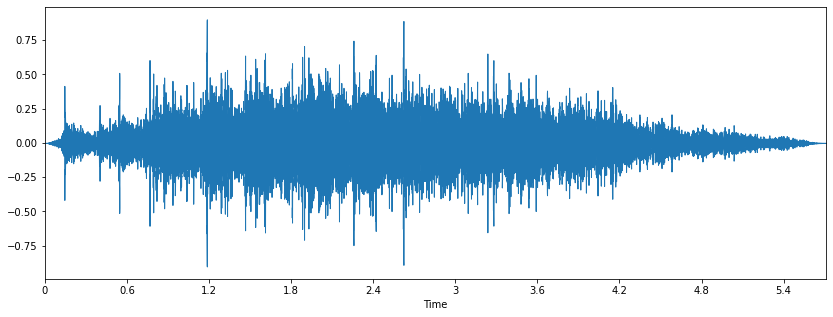

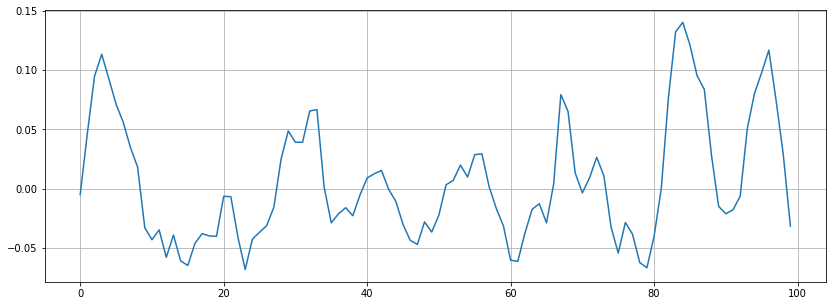

In [ ]:
x, sr = librosa.load('a1.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

#Zooming in



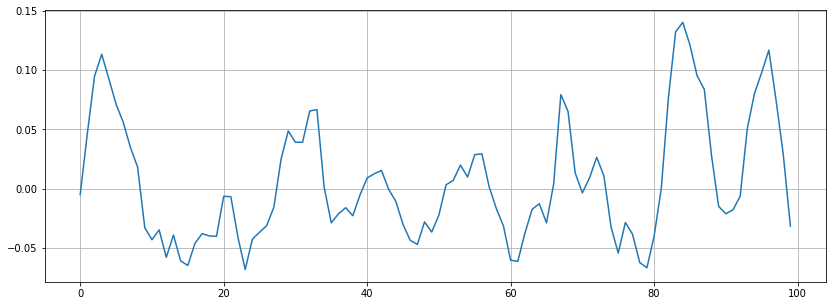

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

16


#
5. Mel-Frequency Cepstral Coefficients(MFCCs)

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

(20, 246)


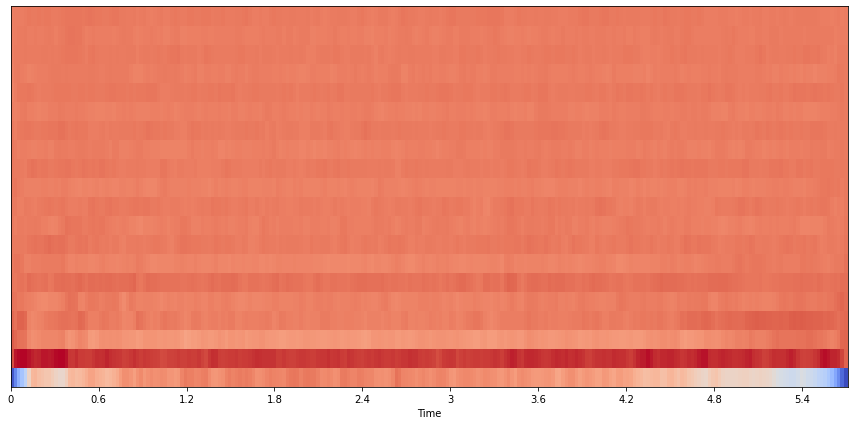

In [ ]:

mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
# (20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

#
6. Chroma feature

A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

librosa.feature.chroma_stft is used for the computation of Chroma features.

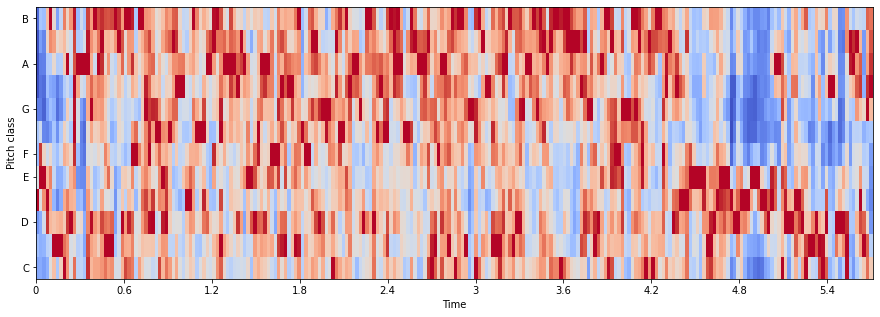

In [ ]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

trying random

a1.wav
1025 22050


[Text(0.5, 1.0, 'MFCC')]

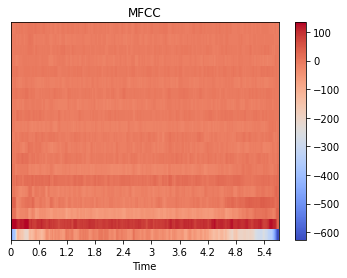

In [ ]:
print(audio_data)
x,sr=librosa.load(audio_data)
print(len(X),sr)
mfcc=librosa.feature.mfcc(x)
mfcc
fig, ax = plt.subplots()
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

#A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.



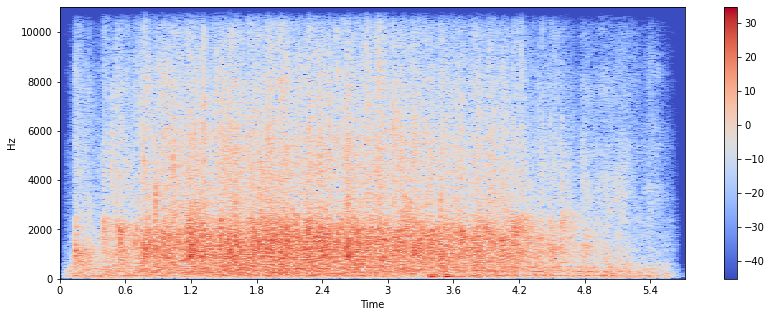

In [ ]:
#display Spectrogram
#spectrogram is a visual representation of the spectrum of frequencies of a signal

X = librosa.stft(x)      # short term Fourier transform.  -> show apltude vs time
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

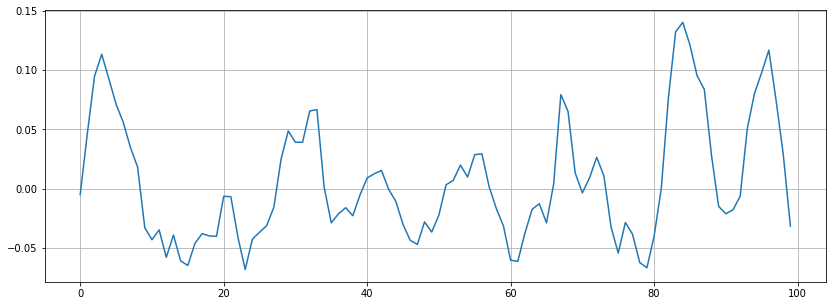

In [ ]:
x, sr = librosa.load(audio_data)

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()
# print(xxx,"yooo")

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
# MFCC — Mel-Frequency Cepstral Coefficients
print(sum(zero_crossings))

16




#This feature is one of the most important method to extract a feature of audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.




(20, 246)


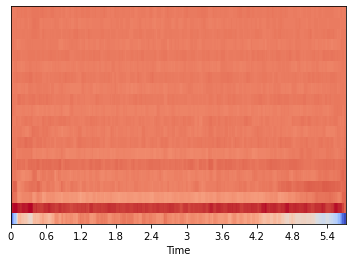

In [ ]:

# 
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

**Log-frequency axis: Features can be obtained from a spectrogram by converting the linear frequency axis, as shown above, into a logarithmic axis. The resulting representation is also called a log-frequency spectrogram. The code we need to write here is:**


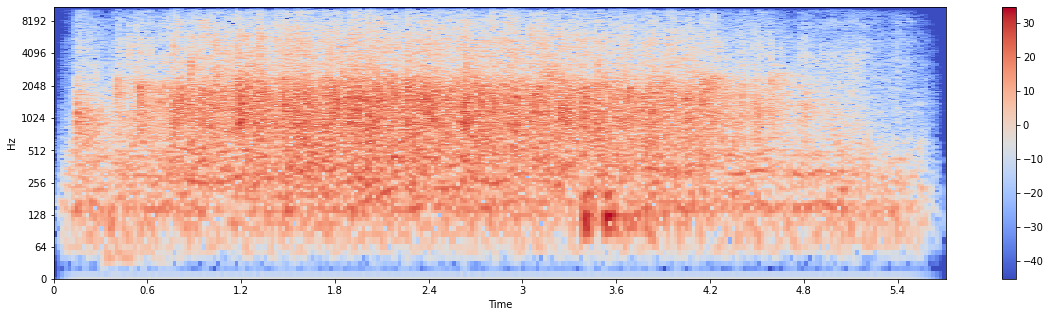

In [ ]:




#x: numpy array
X = librosa.stft(x)
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')


plt.colorbar()


#Spectral Rolloff
The rolloff frequency is defined as the frequency under which the cutoff of the total energy of the spectrum is contained, eg. 85%. It can be used to distinguish between harmonic and noisy sounds.


In [ ]:

y, sr = librosa.load(audio_data)
# Approximate maximum frequencies with roll_percent=0.85 (default)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
print(rolloff)
# Approximate minimum frequencies with roll_percent=0.1
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.1)
print(rolloff)

[[3649.87792969 2530.15136719 3100.78125    3057.71484375 3240.74707031
  3822.14355469 3929.80957031 4457.37304688 4414.30664062 4295.87402344
  4285.10742188 4263.57421875 3897.50976562 3714.47753906 3596.04492188
  3649.87792969 3606.81152344 4306.640625   4683.47167969 4597.33886719
  5566.33300781 5544.79980469 5480.20019531 4392.7734375  4155.90820312
  4015.94238281 4640.40527344 4575.80566406 4177.44140625 4554.27246094
  4737.3046875  5351.00097656 5092.60253906 5081.8359375  4984.93652344
  4640.40527344 4446.60644531 4026.70898438 4360.47363281 4877.27050781
  5264.86816406 5490.96679688 5609.39941406 5480.20019531 5447.90039062
  5318.70117188 5049.53613281 5017.23632812 5135.66894531 4748.07128906
  4629.63867188 4306.640625   4425.07324219 4963.40332031 4651.171875
  4478.90625    5523.26660156 5792.43164062 4575.80566406 4145.14160156
  4371.24023438 5534.03320312 5178.73535156 4737.3046875  5329.46777344
  5157.20214844 4877.27050781 5232.56835938 5178.73535156 4694.238

#Chroma Frequencies
The entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave. The human perception of pitch is periodic in the sense that two pitches are perceived as similar if they differ by one or several octaves (where 1 octave=12 pitches).

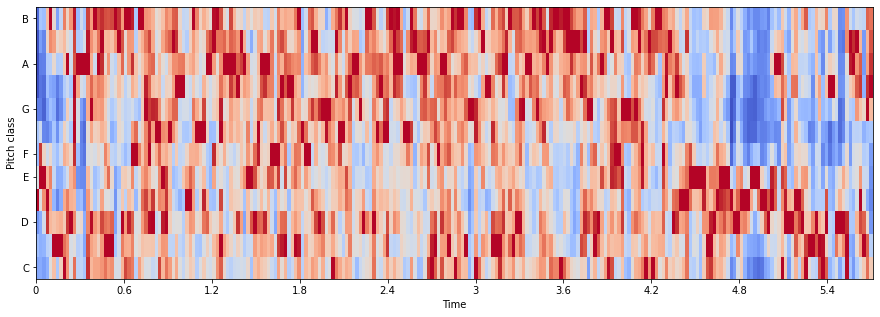

In [ ]:
x, sr = librosa.load('a1.wav')
ipd.Audio(x, rate=sr)

hop_length = 512
# returns normalized energy for each chroma bin at each frame.
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')


tesing


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

In [ ]:
# generate some data with noise
x = np.sort(np.random.uniform(0, 10, 15))
y = 3 + 0.2 * x + 0.1 * np.random.randn(len(x))

In [ ]:
# find L1 line fit
l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
xopt1 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y))

# find L2 line fit
l2_fit = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
xopt2 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y))

Optimization terminated successfully.
         Current function value: 0.802717
         Iterations: 44
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.078117
         Iterations: 44
         Function evaluations: 89


In [ ]:
y2 = y.copy()
y2[3] += 4
y2[13] -= 3

# refit the lines
xopt12 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y2))
xopt22 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y2))

Optimization terminated successfully.
         Current function value: 7.661430
         Iterations: 48
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 20.563897
         Iterations: 47
         Function evaluations: 91


In [ ]:
# sum of two sinusoids
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

In [ ]:
# extract small sample of signal
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

In [ ]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]

# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -6.542e-23  -0.000e+00  +3e+04  1e+00  1e-02  1e+00  3e+00    ---    ---    1  1  - |  -  - 
 1  +1.310e+02  +1.311e+02  +1e+04  9e-01  5e-03  5e-01  1e+00  0.6349  9e-02   1  1  1 |  0  0
 2  +1.794e+02  +1.796e+02  +9e+03  7e-01  4e-03  6e-01  9e-01  0.4512  6e-01   1  1  0 |  0  0
 3  +2.150e+02  +2.152e+02  +6e+03  5e-01  2e-03  4e-01  6e-01  0.6023  4e-01   1  0  0 |  0  0
 4  +2.568e+02  +2.570e+02  +3e+03  3e-01  1e-03  3e-01  3e-01  0.6693  4e-01   1  0  0 |  0  0
 5  +2.890e+02  +2.891e+02  +2e+03  2e-01  8e-04  2e-01  2e-01  0.5179  2e-01   1  0  0 |  0  0
 6  +3.190e+02  +3.190e+02  +9e+02  8e-02  4e-04  8e-02  9e-02  0.6594  3e-01   1  0  1 |  0  0
 7  +3.410e+02  +3.410e+02  +4e+02  4e-02  2e-04  4e-02  4e-02  0.6933  2e-01   1  1  1 |  0  0
 8  +3.552e+02  +3.552e+02  +2e+02  2e-02  8e-

In [ ]:
!python main.py

44100
(128, 5292)
(128,)


In [ ]:
# coding: utf-8

# http://brocabrain.blogspot.ru/2012/10/compressed-sensing-with-sklearn-dtmf.html
# 
# ## Magic Reconstruction
# 
# I first read about compressed sensing about two years ago, on Cleve's Corner, a column which Cleve Moler, the founder of Mathworks, writes anually. The 2010 article was called "Magic Reconstruction: Compressed Sensing". Compressed (or compressive) sensing is immediately appealing for a number of reasons. It has all the features of a cool signal processing problem. It seems to beat the Shannon-Nyquist sampling theorem by making use of sparsity in real signals, and this sparsity begs the question - sparsity in which basis? This question in turn calls for some prior information about the data in question, which potentially leads to a wide range of other mathematical problems. (Perhaps a machine learning problem for detecting which basis are appropriate for a given set of signals, especially when prior information about signals is not available.)
# 
# But even without all this, as Moler points out, the real appeal of compressed sensing lies in the underlying matrix problem. This problem requires a great deal of rigour in linear algebra and convex optimization. I did get to those problems eventually, but initially I was more curious as to whether compressed sensing really worked, and I tried out the example in his post in Python. That's what this post is about.
# 
# ## Python Implementation of the DTMF Example
# 
# The problem consists simply of creating a touchtone signal, trying to compress and decompress it, and checking whether the original signal and the reconstructed signal match acoustically. Let's step through the programme step by step.

# In[1]:

# Imports
from sklearn.linear_model import Lasso
from scipy.fftpack import dct, idct
from scipy.sparse import coo_matrix
from matplotlib.pyplot import plot, show, figure, title
import numpy as np


# We pick any two touchtone frequencies $f_1$ and $f_2$ (in this case 697 Hz and 1336 Hz, corresponding to the '5' key on the keypad), and play the following signal for an eighth of a second.
# $f = \sin(2\pi f_1t) + \sin(2\pi f_1t)$
# At a sampling rate of 4 kHz, it comes to 5000 samples. As per the example, we take 500 random samples of this signal.

# In[11]:

# Initializing constants and signals
N = 5000
FS = 4e4
M = 500
f1, f2 = 697, 1336  # Pick any two touchtone frequencies
duration = 1. / 8
t = np.linspace(0, duration, duration * FS)
f = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
f = np.reshape(f, (len(f), 1))

# Displaying the test signal
plot(t, f)
title('Original Signal')
show()

# Randomly sampling the test signal
k = np.random.randint(0, N, (M,))
k = np.sort(k)  # making sure the random samples are monotonic
b = f[k]
plot(t, f, 'b', t[k], b, 'r.')
title('Original Signal with Random Samples')
show()


# Since this is a simple, almost stationary signal, a simple basis like discrete cosines should suffice to bring out the sparsity.

# In[12]:

D = np.fft.fft(np.eye(N))
A = D[k, :]


# Here $A$ is a matrix which contains a subset of 500 discrete cosine bases, and we need to solve $Ax=b$ for $x$. It is a nonlinear optimization problem and there are many solutions, but it turns out that the one that minimizes the $L_1$ norm of the solution gives the best estimate of the original signal. Since this is an optimization problem, it can be solved with many of the methods in scipy.optimize, say by taking the least squares solution of the equation (or the $L_2$ norm) as the first guess and minimizing iteratively. But I took the easier approach and used the Lasso estimator in the sklearn package, which is essentially a linear estimator that penalizes (regularizes) its weights in the $L_1$ sense. (A really cool demonstration of compressed sensing for images using Lasso is [here](http://scikit-learn.org/0.14/auto_examples/applications/plot_tomography_l1_reconstruction.html)).

# In[18]:

lasso = Lasso(alpha=0.001)
lasso.fit(A, b.reshape((M,)))

# Plotting the reconstructed coefficients and the signal
plot(lasso.coef_)
# xlim([0, 500])
title('FFT of the Reconstructed Signal')
recons = np.fft.ifft(lasso.coef_.reshape((N, 1)), axis=0)
figure()
plot(t, recons)
title('Reconstucted Signal')
show()


# As can be seen through the plots, most of the coefficients of the lasso estimator as zeros. It is the discrete cosine transform of these coefficients that is the reconstructed signal. Since the coefficients are sparse, they can be compressed into a scipy.sparse matrix.

# In[8]:

recons_sparse = coo_matrix(lasso.coef_)
sparsity = 1 - float(recons_sparse.getnnz()) / len(lasso.coef_)
print (sparsity)

# As it turns out, the compressed matrix is about 90% sparse. Thus, we have managed to reconstruct the signal from only 10% of its samples.
# 
# ## Validating the Reconstruction
# 
# A reasonably reliable method of validating the compression and reconstruction is to listen to the original  signal and check if the reconstructed signal sounds similar. The scikits.audiolab package can be used to play sound straight from numpy arrays. (I couldn't make audiolab work, so I validated this by saving the reconstructed array into a .mat file and playing it out in Octave.) The python codes used here are available as an ipython notebook and a python script in this repository.
# 


TypeError: ignored